In [2]:
import pandas as pd
import json

In [3]:
def read_jsons(filedir:str):
    with open(filedir) as f:
        data = json.load(f)
    # Convert the JSON data to a DataFrame
    return pd.DataFrame.from_dict(data["playlists"])

# Filter Data

In [4]:
def get_count_artists(df: pd.DataFrame, bigger_than):
    artist_names = df["tracks"].apply(lambda x: [track["artist_name"] for track in x]).explode()
    artist_counts = artist_names.value_counts()
    return dict(artist_counts[artist_counts > bigger_than])

In [5]:
# RANGE = range(0, 1000)
# artist = dict()

# for index in RANGE:
#     df = read_jsons(f"../datasets/data/{index}.json")
#     counts = get_count_artists(df, 10)
#     for artist_name, count in counts.items():
#         if artist_name in artist:
#             artist[artist_name] += count
#         else:
#             artist[artist_name] = count
#     del df

In [6]:
# df = pd.DataFrame.from_dict(artist, orient='index', columns=["count"]).sort_values(by="count", ascending=False)
df = pd.read_csv("../datasets/artist_count.csv")
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,count
0,0,0,0,Drake,847160
1,1,1,1,Kanye West,413297
2,2,2,2,Kendrick Lamar,353624
3,3,3,3,Rihanna,339570
4,4,4,4,The Weeknd,316603
...,...,...,...,...,...
25468,25468,25468,25468,LA Priest,11
25469,25469,25469,25469,Julian Jordan,11
25470,25470,25470,25470,King James,11
25471,25471,25471,25471,Max Melvin,11


In [7]:
df.describe()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,count
count,25473.00000,25473.00000,25473.00000,25473.000000
mean,12736.00000,12736.00000,12736.00000,1827.298473
std,7353.56604,7353.56604,7353.56604,12745.446941
min,0.00000,0.00000,0.00000,11.000000
25%,6368.00000,6368.00000,6368.00000,14.000000
50%,12736.00000,12736.00000,12736.00000,29.000000
75%,19104.00000,19104.00000,19104.00000,100.000000
max,25472.00000,25472.00000,25472.00000,847160.000000


<Axes: ylabel='Frequency'>

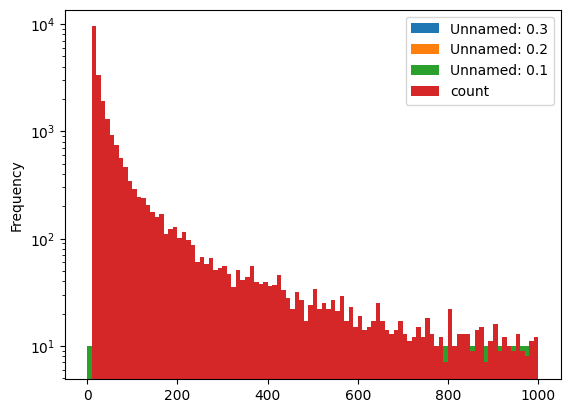

In [8]:
df.plot.hist(bins=100, range=(0, 1000), log=True)

<Axes: >

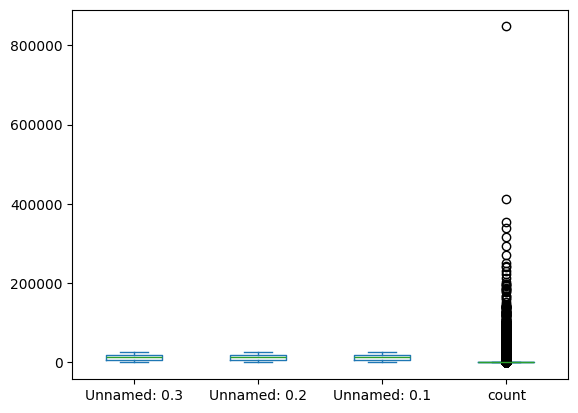

In [9]:
df.plot.box()

In [10]:
# calculate range interquartile
Q1 = df["count"].quantile(0.25)
Q3 = df["count"].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 14.0, Q3: 100.0, IQR: 86.0


In [11]:
# get df without outliers
df_no_outliers = df[(df["count"] > (Q1 - 1.5 * IQR)) & (df["count"] < (Q3 + 1.5 * IQR))]

<Axes: ylabel='Frequency'>

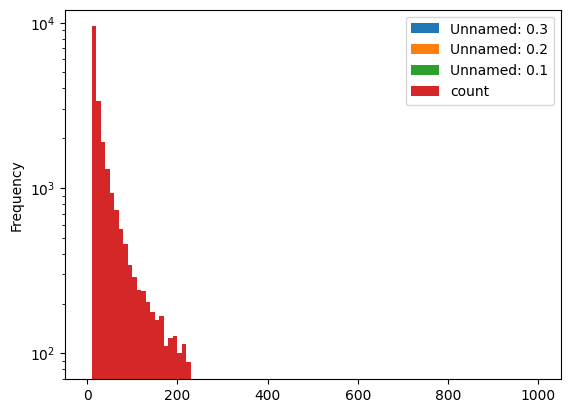

In [12]:
df_no_outliers.plot.hist(bins=100, range=(0, 1000), log=True)

In [13]:
df_no_outliers.describe()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,count
count,21245.00000,21245.00000,21245.00000,21245.000000
mean,14850.00000,14850.00000,14850.00000,40.828524
std,6133.04757,6133.04757,6133.04757,43.628038
min,4228.00000,4228.00000,4228.00000,11.000000
25%,9539.00000,9539.00000,9539.00000,13.000000
50%,14850.00000,14850.00000,14850.00000,23.000000
75%,20161.00000,20161.00000,20161.00000,48.000000
max,25472.00000,25472.00000,25472.00000,228.000000


In [14]:
df.to_csv("../datasets/artist_count.csv")

# Get data


In [15]:
def get_set_artists(df: pd.DataFrame, bigger_than):
    artist_names = df["tracks"].apply(lambda x: [track["artist_name"] for track in x]).explode()
    artist_counts = artist_names.value_counts()
    return artist_counts[artist_counts > bigger_than].index

In [16]:
def save_csv(file: int, filename: str, edges: list):
    print("Saving file", file)
    # Save the filein csv in format of edges
    # user , song_name
    dp = pd.DataFrame(edges, columns=["node_1", "node_2"])
    # delimeter ;
    dp.to_csv(f"../datasets/edges/{filename}-{file}.csv", index=False, sep=";",header = False)
    del dp

## Edges between Artists

In [17]:
edges = list()
RANGE = range(0, 1001)
names = set(df_no_outliers["Unnamed: 0"])
print(names)

def get_edges_artists(filename: str):
    for file in RANGE:
        if file % 250 == 0 and file != 0:
            print("Reading file", file)
            save_csv(file, filename, edges)
            edges.clear()
            if file == 1000:
                return
        df: pd.DataFrame = read_jsons(f"../datasets/data/{file}.json")
        # Seleccionar la mitad
        df = df.sample(frac=0.1)
        for _, row in df.iterrows():
            songs = row["tracks"]
            j = 1
            for song_a in songs:
                if j == len(songs):
                    break
                if (
                    song_a["artist_name"] != songs[j]["artist_name"]
                    and song_a["artist_name"] in names
                    or songs[j]["artist_name"] in names
                ):
                    if (
                        song_a["artist_name"] != songs[j]["artist_name"]
                    ):  # Evitar aristas a sí mismo
                        edges.append(
                            (
                                song_a["artist_name"]
                                .strip()
                                .replace(";", ",")
                                .replace(" ", "_")
                                .replace("$", "S"),
                                songs[j]["artist_name"]
                                .strip()
                                .replace(";", ",")
                                .replace(" ", "_")
                                .replace("$", "S"),
                            )
                        )
                j += 1

{'Joseph Loduca', '2gether', 'Gabriel Fauré', 'Fernando Sor', 'Apecrime', 'Walker Hayes', 'The Correspondents', 'Bruce Kurnow', 'Toploader', 'Flor', 'Garcia Delva', 'Orquesta Raiz Latina', 'Monophonics', 'Alfonzo Blackwell', 'Ian Ewing', 'La Duda', 'The Well', 'The Carburetors', 'Flannel Graph', 'Kiubbah Malon', 'The Tragic Thrills', 'Dark Tranquillity', '30 Corridos Prohibidos', 'Steve Arrington', 'Parazitii', 'Wilfrido Vargas', 'Millonario', 'Natia', 'Swear and Shake', 'Lindell Cooley', 'Moya Brennan', 'Chelsea Moon & Uncle Daddy', 'Karrin Allyson', 'Satellites & Sirens', 'Mikey Dread', 'Kansas City Bankroll', 'Teengenerate', 'Great Apes', 'Thomas Road Baptist Church', 'Chris Geith', 'Coleman Hawkins', 'Low Low', 'Omar Khairat', 'Trap Nation', 'Pete Davidson', 'Orquestra Imperial', 'South of France', 'Tilly And The Wall', 'Global Goon', 'Bear Vs. Shark', 'Motopony', 'Pedro Ramaya Beltran', 'Tomas Ledin', 'Sik-K', 'Rachel Currea', 'Acid House Kings', 'South Jordan', 'N.Flying', 'Archn

In [18]:
# get_edges_artists("Artist")

In [19]:
edges = set()
RANGE = range(0, 1000)
names = set(df_no_outliers["Unnamed: 0"])


def get_edges_artists(filename: str):
    for file in RANGE:
        if file % 250 == 0 and file != 0:
            print("Reading file", file)
        df: pd.DataFrame = read_jsons(f"../datasets/data/{file}.json")
        # Seleccionar la mitad
        # df = df.sample(frac=0.1)
        for _, row in df.iterrows():
            songs = row["tracks"]
            j = 1
            for song_a in songs:
                if j == len(songs):
                    break
                if song_a["artist_name"] != songs[j]["artist_name"] and (
                    song_a["artist_name"] in names and songs[j]["artist_name"] in names
                ):
                    edges.add(
                        (
                            song_a["artist_name"]
                            .strip()
                            .replace(";", ",")
                            .replace(" ", "_")
                            .replace("$", "S"),
                            songs[j]["artist_name"]
                            .strip()
                            .replace(";", ",")
                            .replace(" ", "_")
                            .replace("$", "S"),
                        )
                    )
                j += 1
    # Guardar todas las aristas en un solo archivo
    save_csv(0, filename, list(edges))

In [20]:
get_edges_artists("Artist")

Reading file 250
Reading file 500
Reading file 750
Saving file 0
